# Anomaly Detection

## Import required modules

In [179]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.tsa.stattools import acf, pacf
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARMA
from sklearn.metrics import mean_squared_error
from pyramid.arima import auto_arima
import warnings
warnings.simplefilter("ignore")

## Task 1: Familiarization Task

In [180]:
data = pd.read_csv("dataset/BATADAL_dataset03.csv", index_col="DATETIME")
data.index = pd.to_datetime(data.index)
data.head()

,L_T1,L_T2,L_T3,L_T4,L_T5,L_T6,L_T7,F_PU1,S_PU1,F_PU2,...,P_J256,P_J289,P_J415,P_J302,P_J306,P_J307,P_J317,P_J14,P_J422,ATT_FLAG
DATETIME,,,,,,,,,,,,,,,,,,,,,
2014-06-01 00:00:00,0.509730,2.049003,3.191145,2.792634,2.656091,5.316831,1.562321,98.998444,1,99.018150,...,87.605774,26.495605,84.206619,18.901676,81.983734,18.791777,67.125603,29.387470,28.487471,0
2014-06-01 01:00:00,0.412580,2.009072,3.642565,2.831673,3.126387,5.494855,1.852043,99.095901,1,99.115639,...,89.448341,26.487326,85.900085,18.849329,82.150589,18.739643,67.178696,29.354256,28.454256,0
2014-06-01 02:00:00,0.320112,1.986093,4.140192,3.256733,3.574601,5.500000,2.246126,98.420959,1,98.440498,...,91.056114,26.487364,86.582474,19.597170,83.988579,19.496712,72.425293,29.354538,28.454538,0
2014-06-01 03:00:00,0.332879,2.009203,4.673478,3.744497,3.952379,5.500000,3.203573,97.575172,1,97.594460,...,92.594353,26.575815,88.020546,26.028486,64.670486,25.922703,76.275040,29.449951,28.549952,0
2014-06-01 04:00:00,0.483496,2.089049,5.237937,4.409456,3.504676,5.500000,4.439714,97.351059,1,97.370277,...,94.473099,26.723457,90.422462,26.209970,64.746620,26.104692,76.703529,29.574265,28.674263,0


In [181]:
data.columns

Index(['L_T1', 'L_T2', 'L_T3', 'L_T4', 'L_T5', 'L_T6', 'L_T7', 'F_PU1',
       'S_PU1', 'F_PU2', 'S_PU2', 'F_PU3', 'S_PU3', 'F_PU4', 'S_PU4', 'F_PU5',
       'S_PU5', 'F_PU6', 'S_PU6', 'F_PU7', 'S_PU7', 'F_PU8', 'S_PU8', 'F_PU9',
       'S_PU9', 'F_PU10', 'S_PU10', 'F_PU11', 'S_PU11', 'F_V2', 'S_V2',
       'P_J280', 'P_J269', 'P_J300', 'P_J256', 'P_J289', 'P_J415', 'P_J302',
       'P_J306', 'P_J307', 'P_J317', 'P_J14', 'P_J422', 'ATT_FLAG'],
      dtype='object')

We can see that there are several kinds of signal readings provided in the SCADA data. The description of each signal is provided in https://batadal.net/images/rules.pdf. Basically the types of signal are:

* L_T1 - L_T7: depicts the water level of Tank 1 to 7
* F_PU1 - F_PU11: depicts the flow through Pump 1 - Pump 11
* S_PU1 - S_PU11: depicts the status of Pump 1 - Pump 11 with value 0 (OFF) or 1 (ON)
* F_V2: depicts the flow through Valve 2
* S_V2: depicts the status of Valve 2 with value 0 (CLOSED) or 1 (OPEN)
* P_JXXX: depicts the suction and discharge pressure of a pumping station which the junction is located

In [182]:
start_time = 0 # the start time
time_span = 160 # how much time to plot

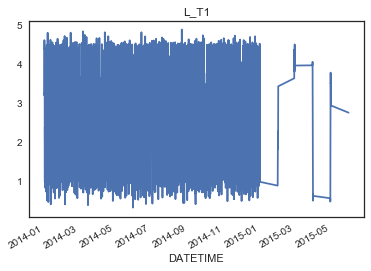

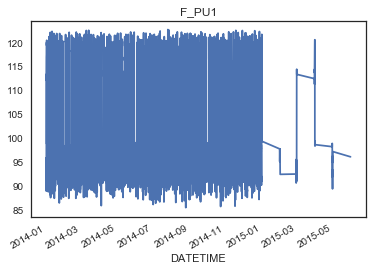

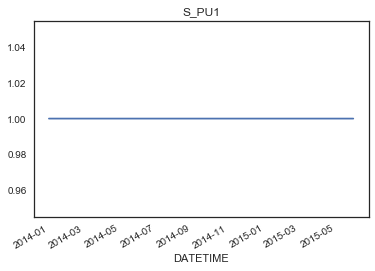

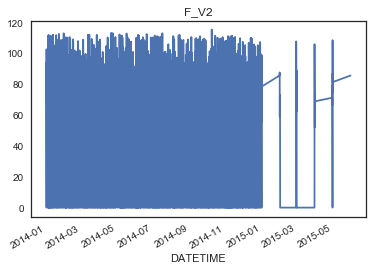

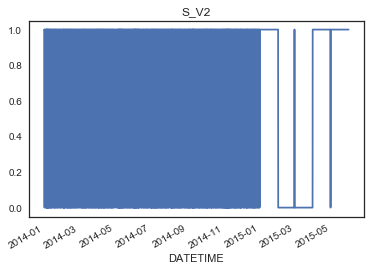

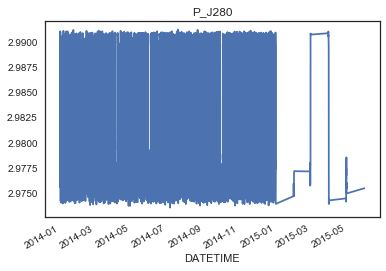

In [183]:
for signal in ["L_T1", "F_PU1", "S_PU1", "F_V2", "S_V2", "P_J280"]:
    plt.figure()
    data[signal][:].plot()
    plt.title(signal)

### Correlation

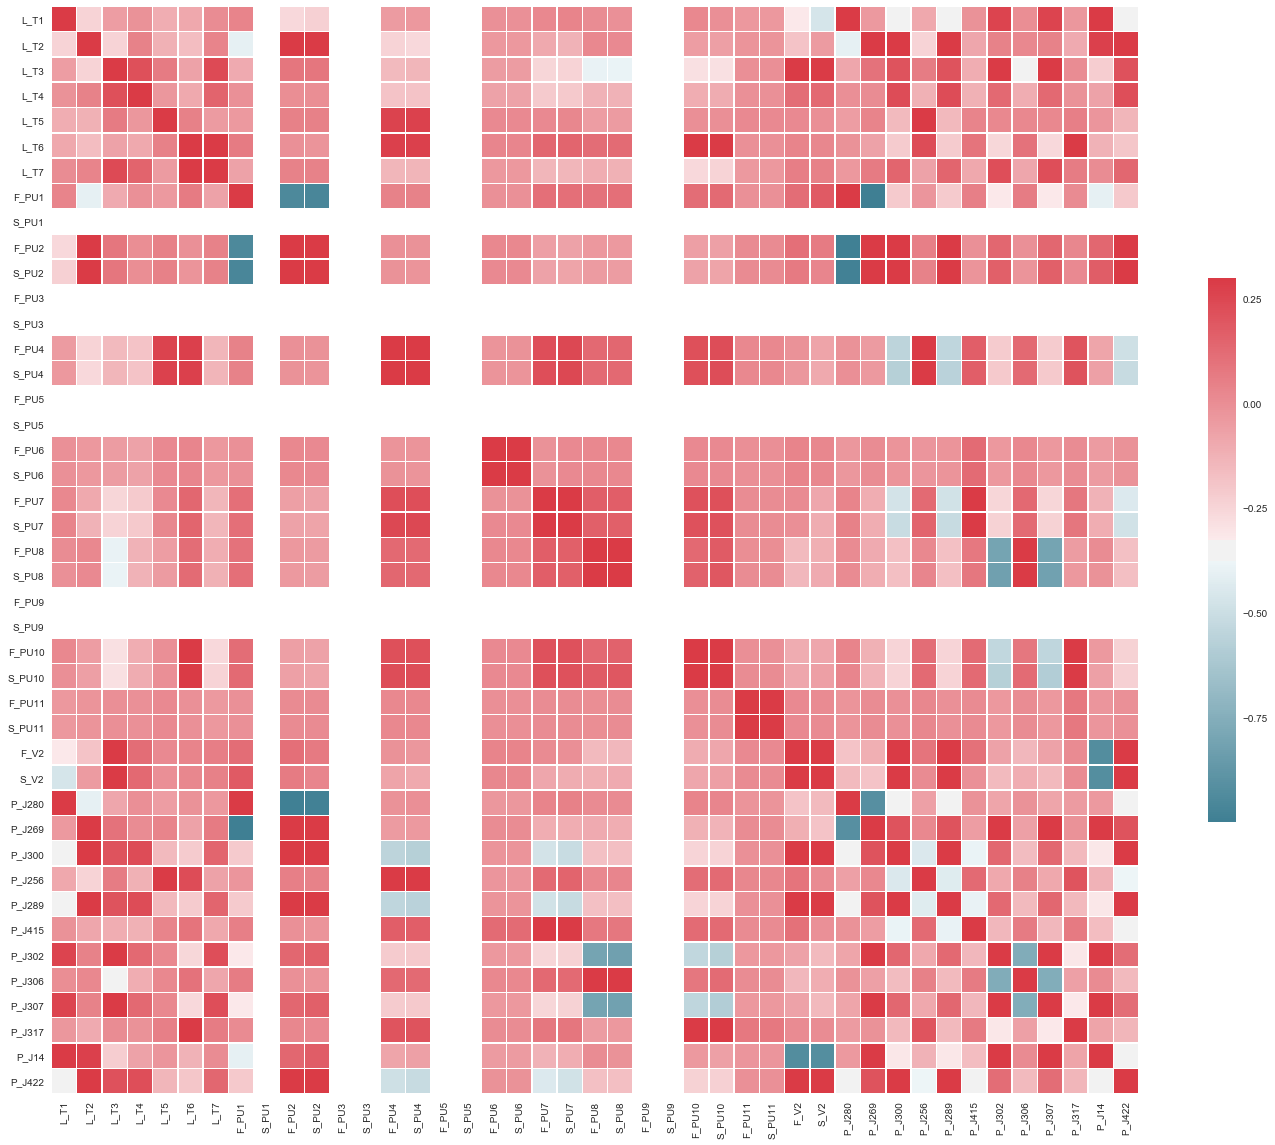

In [184]:
temp = data.drop("ATT_FLAG",axis=1,inplace=False)

sns.set(style="white")
# Compute the correlation matrix
corr = temp.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(25, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
# from https://seaborn.pydata.org/examples/many_pairwise_correlations.html
sns.heatmap(corr, cmap=cmap, vmax=0.3,
            square=True, xticklabels=corr.columns.values, yticklabels=corr.columns.values,
            linewidths=0.5, cbar_kws={"shrink": .5}, ax=ax)

### Prediction Model using Autoregression

#### Autocorrelation plot

In [185]:
def plot_acf_pacf(ts, nlags=20, title=''):
    lag_acf = acf(ts, nlags=nlags)
    
    plt.subplot(211) 
    plt.plot(lag_acf)
    plt.axhline(y=0,linestyle='--',color='gray')
    plt.axhline(y=-1.96/np.sqrt(len(ts)),linestyle='--',color='gray')
    plt.axhline(y=1.96/np.sqrt(len(ts)),linestyle='--',color='gray')
    plt.title('Autocorrelation Function of '+title)
    
    lag_pacf = pacf(ts, nlags=nlags, method='ols')
    plt.subplot(212)
    plt.plot(lag_pacf)
    plt.axhline(y=0,linestyle='--',color='gray')
    plt.axhline(y=-1.96/np.sqrt(len(ts)),linestyle='--',color='gray')
    plt.axhline(y=1.96/np.sqrt(len(ts)),linestyle='--',color='gray')
    plt.title('Partial Autocorrelation Function of ' + title)
    plt.tight_layout()


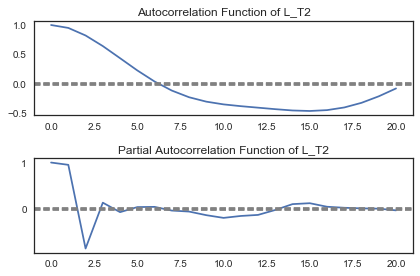

In [186]:
plot_acf_pacf(data['L_T2'], title="L_T2")

Lag: 37
Coefficients: [ 4.28791538e-01  1.71433160e+00 -9.30773460e-01  2.67341076e-01
 -7.14957657e-02 -1.02241316e-01  3.33309274e-02 -4.50823472e-02
  8.75216892e-05  9.29861388e-02 -4.41530823e-02  2.49594128e-02
 -5.53992100e-03 -7.19882517e-02 -4.72564474e-02  7.56041309e-02
  8.43370057e-03  1.07379747e-02 -5.04435942e-02  7.00790522e-03
  1.01333927e-02 -3.45236499e-02  1.03691217e-01  1.13538254e-03
  1.16663433e-02 -8.64861508e-02 -1.85555396e-02 -4.50382295e-02
  3.95669070e-02  1.26009175e-02  3.90865436e-02  1.78719887e-02
 -2.77130893e-02 -3.66664831e-02  3.48586185e-03  4.70029237e-02
  3.75131407e-02 -7.12803451e-02]
predicted=1.073243, expected=0.869968
predicted=0.684354, expected=0.663842
predicted=0.599365, expected=1.031355
predicted=0.822821, expected=1.591397
predicted=1.265122, expected=2.480027
predicted=1.811987, expected=3.203121
predicted=2.353368, expected=3.657291
predicted=2.839373, expected=4.082142
predicted=3.226049, expected=4.450097
predicted=3.48889

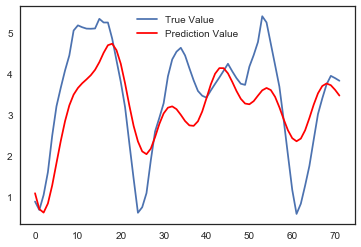

In [187]:
# split dataset
series = data['L_T2']
X = series.values
train, test = X[1:len(X)-72], X[len(X)-72:]
# train autoregression
model = AR(train)
model_fit = model.fit()
print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)
# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
	print('predicted=%f, expected=%f' % (predictions[i], test[i]))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot results
plt.plot(test, label="True Value")
plt.plot(predictions, color='red',label="Prediction Value")
plt.legend()
plt.show()

## Task 2: ARMA Task

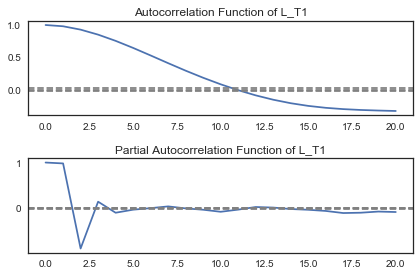

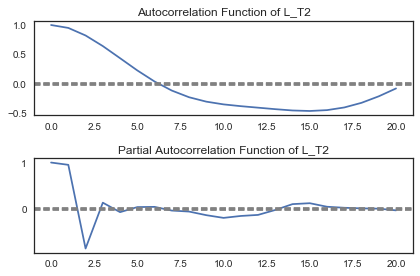

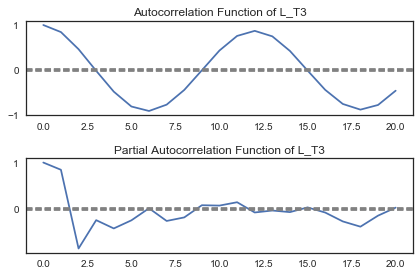

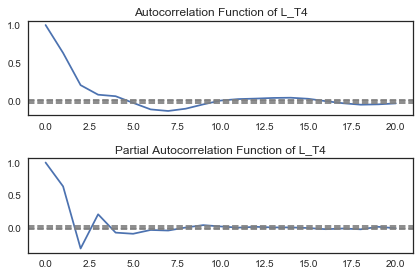

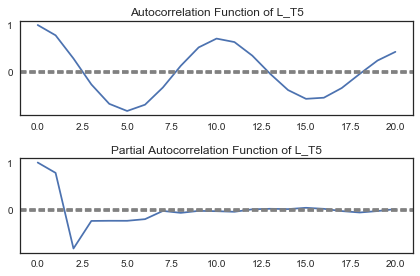

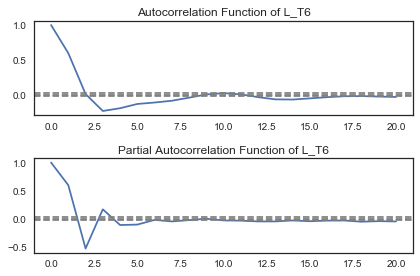

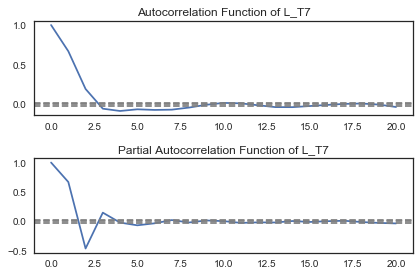

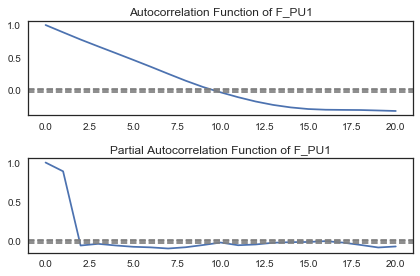

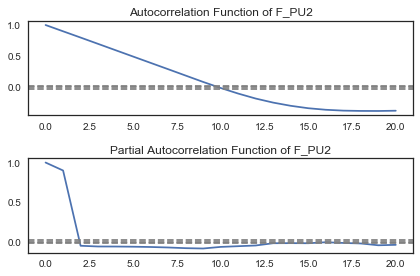

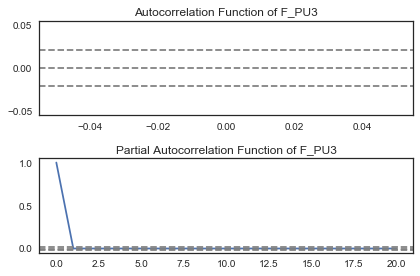

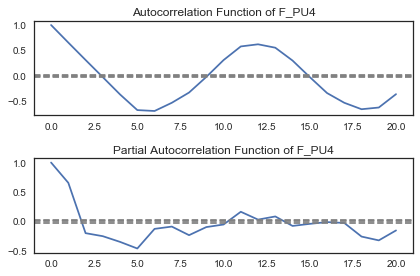

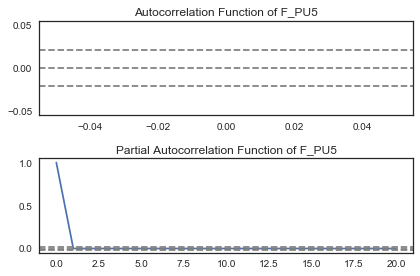

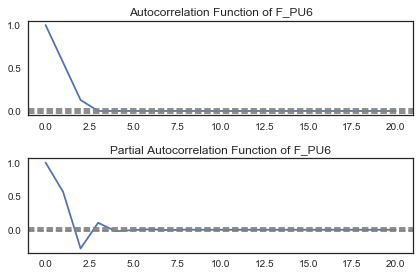

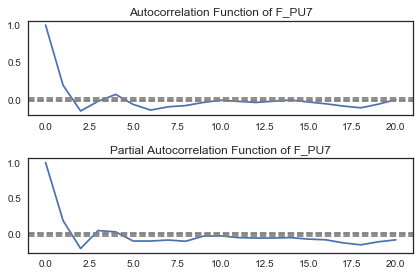

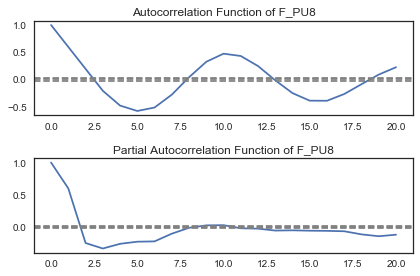

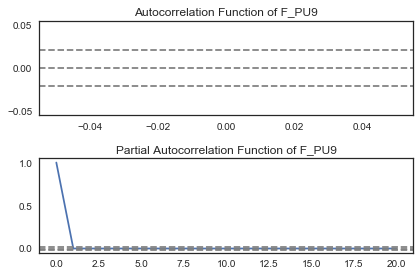

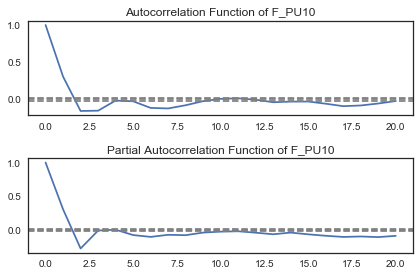

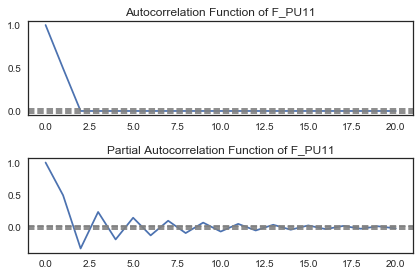

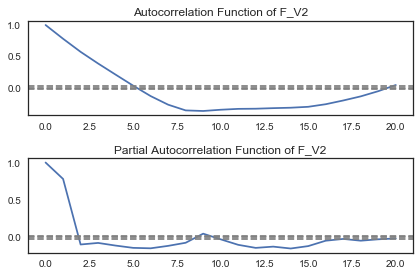

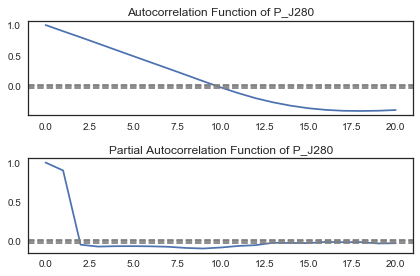

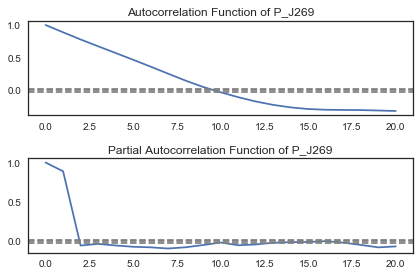

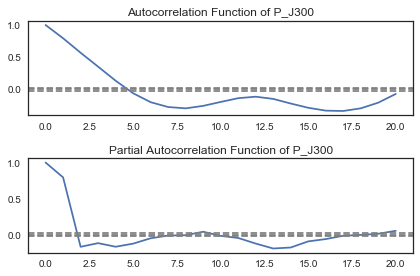

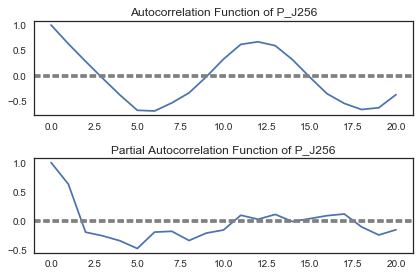

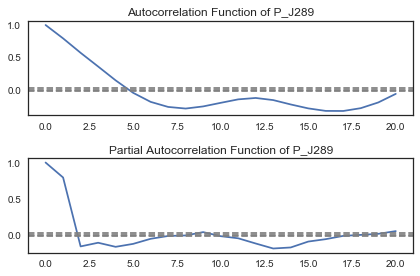

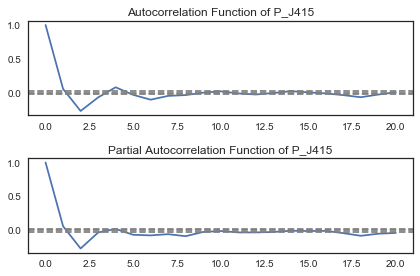

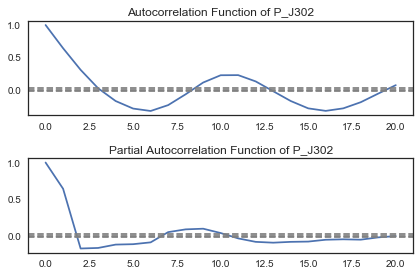

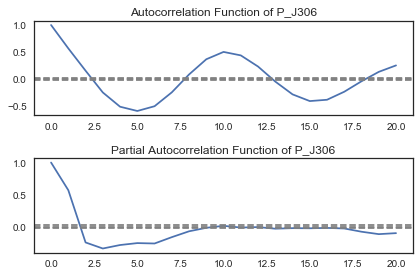

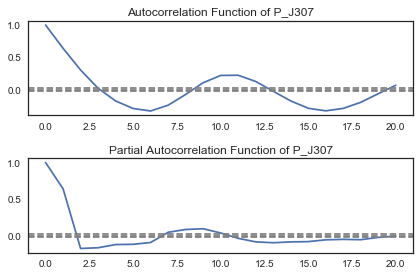

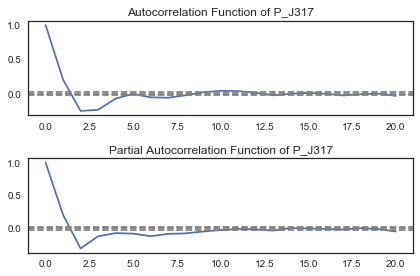

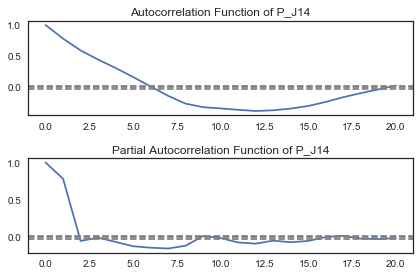

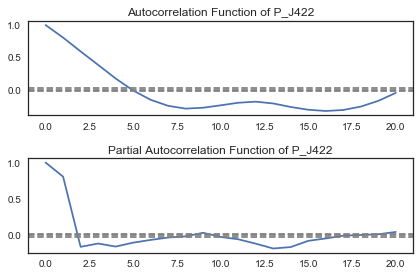

In [188]:
# list the sensors column
sensors = ['L_T1', 'L_T2', 'L_T3', 'L_T4', 'L_T5', 'L_T6', 'L_T7', 'F_PU1',
       'F_PU2', 'F_PU3', 'F_PU4', 'F_PU5', 'F_PU6', 'F_PU7', 'F_PU8', 'F_PU9', 'F_PU10', 'F_PU11', 'F_V2',
       'P_J280', 'P_J269', 'P_J300', 'P_J256', 'P_J289', 'P_J415', 'P_J302',
       'P_J306', 'P_J307', 'P_J317', 'P_J14', 'P_J422']

# autocorrelation for each sensor
for sensor in sensors:
    plt.figure()
    plot_acf_pacf(data[sensor], title=sensor)


We can see from the autocorrelation plot, that a good starting lag number is where the function passes the upper CI (top gray line) for the first time in the PACF (for p of AR) and in the ACF (for q of MA). We will use the auto_arima function to grid-search the best parameter for p and q using AIC as the criterion. Let's try it first on `L_T1`.

In [189]:
stepwise_model = auto_arima(data['L_T1'], start_p=1, start_q=1,
                           max_p=2, max_q=10, seasonal=False,
                           d=0, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

Fit ARIMA: order=(1, 0, 1); AIC=-7752.456, BIC=-7724.143, Fit time=3.115 seconds
Fit ARIMA: order=(0, 0, 0); AIC=28103.160, BIC=28117.316, Fit time=0.005 seconds
Fit ARIMA: order=(1, 0, 0); AIC=-558.100, BIC=-536.866, Fit time=0.078 seconds
Fit ARIMA: order=(0, 0, 1); AIC=16531.825, BIC=16553.059, Fit time=1.012 seconds
Fit ARIMA: order=(2, 0, 1); AIC=-13266.336, BIC=-13230.946, Fit time=9.114 seconds
Fit ARIMA: order=(2, 0, 0); AIC=-13038.324, BIC=-13010.011, Fit time=1.496 seconds
Fit ARIMA: order=(2, 0, 2); AIC=-13286.692, BIC=-13244.224, Fit time=5.265 seconds
Fit ARIMA: order=(1, 0, 2); AIC=-10576.712, BIC=-10541.321, Fit time=2.786 seconds
Fit ARIMA: order=(2, 0, 3); AIC=-13301.274, BIC=-13251.727, Fit time=7.073 seconds
Fit ARIMA: order=(1, 0, 3); AIC=-11778.861, BIC=-11736.392, Fit time=2.687 seconds
Fit ARIMA: order=(2, 0, 4); AIC=-13300.328, BIC=-13243.703, Fit time=8.509 seconds
Total fit time: 41.143 seconds


In [190]:
stepwise_model
arma_order = (stepwise_model.order[0],stepwise_model.order[2])
arma_order

(2, 3)

Okay, so we found the model with smalles AIC number with p=2 and q=8. Let's fit the model and plot the residual

count    8761.000000
mean       -0.000196
std         0.115467
min        -2.166229
25%        -0.067213
50%        -0.000751
75%         0.068881
max         0.485283
dtype: float64

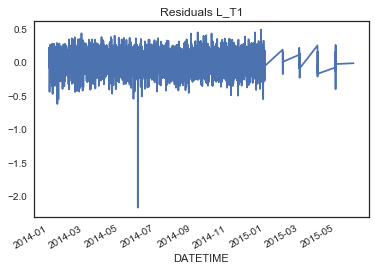

In [191]:
model_fit = ARMA(data['L_T1'], order=(arma_order)).fit()
residualsTraining = model_fit.resid
plt.title("Residuals L_T1")
residualsTraining.plot()
residualsTraining.describe()

In [192]:
# adjusting threshold based on training set
def adjust_threshold(residuals, percentile):
    threshold = np.percentile(abs(residuals),percentile)
    return threshold

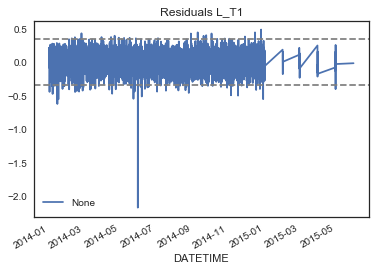

In [193]:
# let's set threshold
threshold = adjust_threshold(residualsTraining, 99)
plt.title("Residuals L_T1")
residualsTraining.plot()
plt.axhline(y=thresholds["L_T1"], linestyle='--',color='gray')
plt.axhline(y=-1*thresholds["L_T1"], linestyle='--',color='gray')
plt.legend()

Okay, so we can see that the absolute maximum of the residual error is 2. So later we may use it to consider the threshold for anomaly detection. Now let's try to do rolling forecast on the test data

In [194]:
test_data = pd.read_csv("dataset/BATADAL_dataset04.csv", index_col="DATETIME")
test_data.index = pd.to_datetime(test_data.index)
test_data.sort_index(inplace=True)
test_data.columns = [x.strip() for x in test_data.columns]
test_data.columns

Index(['L_T1', 'L_T2', 'L_T3', 'L_T4', 'L_T5', 'L_T6', 'L_T7', 'F_PU1',
       'S_PU1', 'F_PU2', 'S_PU2', 'F_PU3', 'S_PU3', 'F_PU4', 'S_PU4', 'F_PU5',
       'S_PU5', 'F_PU6', 'S_PU6', 'F_PU7', 'S_PU7', 'F_PU8', 'S_PU8', 'F_PU9',
       'S_PU9', 'F_PU10', 'S_PU10', 'F_PU11', 'S_PU11', 'F_V2', 'S_V2',
       'P_J280', 'P_J269', 'P_J300', 'P_J256', 'P_J289', 'P_J415', 'P_J302',
       'P_J306', 'P_J307', 'P_J317', 'P_J14', 'P_J422', 'ATT_FLAG'],
      dtype='object')

In [195]:
print(test_data['L_T1'].describe())
print(data['L_T1'].describe())

count    4177.000000
mean        2.707446
std         1.209627
min         0.320000
25%         1.650000
50%         2.820000
75%         3.780000
max         5.730000
Name: L_T1, dtype: float64
count    8761.000000
mean        2.676905
std         1.202940
min         0.320112
25%         1.650647
50%         2.798855
75%         3.754744
max         4.871329
Name: L_T1, dtype: float64


In [196]:
# for manual prediction
def arma_predict(coef, history):
    yhat = 0.0
    for i in range(1, len(coef)+1):
        yhat += coef[i-1] * history[-i]
    return yhat

In [197]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    model = ARMA(data['L_T1'], order=arma_order)
    model_fit = model.fit(disp=False)
    ar_coef, ma_coef = model_fit.arparams, model_fit.maparams
    
    start = max(arma_order)
    resid = [0] * start
    predictions = [0] * start
    for t in range(start,len(test_data['L_T1'])):
        print("t=",t)
        history = test_data['L_T1'][:t]
        yhat = arma_predict(ar_coef, history) + arma_predict(ma_coef, resid)
        predictions.append(yhat)
        expected = test_data['L_T1'][t]
        resid.append(expected - yhat)
        print('>predicted=%.3f, expected=%.3f' % (yhat, expected))
    rmse = np.sqrt(mean_squared_error(test_data['L_T1'], predictions))
    print('Test RMSE: %.3f' % rmse)

t= 3
>predicted=2.877, expected=2.980
t= 4
>predicted=2.970, expected=3.020
t= 5
>predicted=2.949, expected=3.110
t= 6
>predicted=3.095, expected=3.190
t= 7
>predicted=3.147, expected=3.440
t= 8
>predicted=3.564, expected=3.790
t= 9
>predicted=3.965, expected=4.130
t= 10
>predicted=4.272, expected=4.410
t= 11
>predicted=4.495, expected=4.420
t= 12
>predicted=4.246, expected=4.280
t= 13
>predicted=4.017, expected=4.090
t= 14
>predicted=3.797, expected=3.970
t= 15
>predicted=3.747, expected=3.820
t= 16
>predicted=3.551, expected=3.570
t= 17
>predicted=3.219, expected=3.310
t= 18
>predicted=2.979, expected=3.070
t= 19
>predicted=2.761, expected=2.770
t= 20
>predicted=2.404, expected=2.410
t= 21
>predicted=2.012, expected=1.950
t= 22
>predicted=1.475, expected=1.520
t= 23
>predicted=1.107, expected=1.110
t= 24
>predicted=0.717, expected=1.030
t= 25
>predicted=0.968, expected=0.980
t= 26
>predicted=0.878, expected=1.160
t= 27
>predicted=1.300, expected=1.360
t= 28
>predicted=1.470, expected

t= 297
>predicted=2.525, expected=2.470
t= 298
>predicted=2.531, expected=2.650
t= 299
>predicted=2.728, expected=2.870
t= 300
>predicted=2.975, expected=3.110
t= 301
>predicted=3.212, expected=3.290
t= 302
>predicted=3.325, expected=3.590
t= 303
>predicted=3.751, expected=3.720
t= 304
>predicted=3.674, expected=3.640
t= 305
>predicted=3.430, expected=3.600
t= 306
>predicted=3.471, expected=3.530
t= 307
>predicted=3.344, expected=3.430
t= 308
>predicted=3.225, expected=3.240
t= 309
>predicted=2.956, expected=3.060
t= 310
>predicted=2.809, expected=2.920
t= 311
>predicted=2.705, expected=2.770
t= 312
>predicted=2.540, expected=1.370
t= 313
>predicted=-0.068, expected=1.470
t= 314
>predicted=1.826, expected=1.470
t= 315
>predicted=1.295, expected=1.540
t= 316
>predicted=1.536, expected=1.770
t= 317
>predicted=1.939, expected=2.050
t= 318
>predicted=2.206, expected=2.520
t= 319
>predicted=2.864, expected=2.970
t= 320
>predicted=3.240, expected=3.490
t= 321
>predicted=3.831, expected=3.880

>predicted=4.195, expected=4.250
t= 610
>predicted=4.276, expected=4.470
t= 611
>predicted=4.514, expected=4.390
t= 612
>predicted=4.133, expected=4.390
t= 613
>predicted=4.277, expected=4.420
t= 614
>predicted=4.299, expected=4.480
t= 615
>predicted=4.379, expected=4.500
t= 616
>predicted=4.358, expected=4.100
t= 617
>predicted=3.557, expected=3.730
t= 618
>predicted=3.323, expected=3.290
t= 619
>predicted=2.790, expected=2.930
t= 620
>predicted=2.533, expected=2.560
t= 621
>predicted=2.146, expected=2.240
t= 622
>predicted=1.891, expected=1.910
t= 623
>predicted=1.552, expected=1.490
t= 624
>predicted=1.060, expected=0.680
t= 625
>predicted=-0.094, expected=0.560
t= 626
>predicted=0.567, expected=0.460
t= 627
>predicted=0.305, expected=0.500
t= 628
>predicted=0.522, expected=0.740
t= 629
>predicted=0.942, expected=1.120
t= 630
>predicted=1.407, expected=1.500
t= 631
>predicted=1.764, expected=1.640
t= 632
>predicted=1.670, expected=1.720
t= 633
>predicted=1.743, expected=1.650
t= 634

>predicted=1.090, expected=1.130
t= 838
>predicted=0.731, expected=0.910
t= 839
>predicted=0.711, expected=0.800
t= 840
>predicted=0.673, expected=1.760
t= 841
>predicted=2.670, expected=1.310
t= 842
>predicted=0.581, expected=1.080
t= 843
>predicted=0.978, expected=1.080
t= 844
>predicted=1.083, expected=1.370
t= 845
>predicted=1.582, expected=1.650
t= 846
>predicted=1.816, expected=1.840
t= 847
>predicted=1.924, expected=1.900
t= 848
>predicted=1.878, expected=2.040
t= 849
>predicted=2.115, expected=2.210
t= 850
>predicted=2.282, expected=2.090
t= 851
>predicted=1.870, expected=2.030
t= 852
>predicted=1.943, expected=2.000
t= 853
>predicted=1.910, expected=1.970
t= 854
>predicted=1.872, expected=2.110
t= 855
>predicted=2.185, expected=2.130
t= 856
>predicted=2.043, expected=2.060
t= 857
>predicted=1.924, expected=2.020
t= 858
>predicted=1.931, expected=2.040
t= 859
>predicted=1.994, expected=2.160
t= 860
>predicted=2.200, expected=2.370
t= 861
>predicted=2.475, expected=2.600
t= 862


>predicted=3.506, expected=3.640
t= 1117
>predicted=3.393, expected=3.640
t= 1118
>predicted=3.536, expected=3.530
t= 1119
>predicted=3.285, expected=3.600
t= 1120
>predicted=3.571, expected=3.950
t= 1121
>predicted=4.145, expected=4.300
t= 1122
>predicted=4.429, expected=4.480
t= 1123
>predicted=4.457, expected=4.360
t= 1124
>predicted=4.080, expected=4.230
t= 1125
>predicted=4.000, expected=4.050
t= 1126
>predicted=3.755, expected=3.860
t= 1127
>predicted=3.567, expected=3.700
t= 1128
>predicted=3.442, expected=3.170
t= 1129
>predicted=2.547, expected=2.710
t= 1130
>predicted=2.260, expected=2.390
t= 1131
>predicted=2.050, expected=2.310
t= 1132
>predicted=2.180, expected=2.300
t= 1133
>predicted=2.201, expected=2.140
t= 1134
>predicted=1.896, expected=1.990
t= 1135
>predicted=1.805, expected=1.850
t= 1136
>predicted=1.667, expected=1.630
t= 1137
>predicted=1.370, expected=1.300
t= 1138
>predicted=0.961, expected=0.980
t= 1139
>predicted=0.680, expected=0.910
t= 1140
>predicted=0.853

>predicted=1.447, expected=1.570
t= 1318
>predicted=1.239, expected=1.340
t= 1319
>predicted=1.100, expected=1.030
t= 1320
>predicted=0.702, expected=0.870
t= 1321
>predicted=0.727, expected=0.750
t= 1322
>predicted=0.613, expected=0.800
t= 1323
>predicted=0.832, expected=0.880
t= 1324
>predicted=0.909, expected=0.950
t= 1325
>predicted=0.970, expected=1.160
t= 1326
>predicted=1.323, expected=1.470
t= 1327
>predicted=1.691, expected=1.750
t= 1328
>predicted=1.919, expected=1.960
t= 1329
>predicted=2.068, expected=2.040
t= 1330
>predicted=2.029, expected=1.990
t= 1331
>predicted=1.873, expected=2.150
t= 1332
>predicted=2.259, expected=2.380
t= 1333
>predicted=2.493, expected=2.600
t= 1334
>predicted=2.692, expected=2.870
t= 1335
>predicted=3.015, expected=3.110
t= 1336
>predicted=3.204, expected=3.440
t= 1337
>predicted=3.624, expected=3.600
t= 1338
>predicted=3.586, expected=3.600
t= 1339
>predicted=3.469, expected=3.580
t= 1340
>predicted=3.456, expected=3.410
t= 1341
>predicted=3.129

>predicted=1.136, expected=1.240
t= 1672
>predicted=1.305, expected=1.390
t= 1673
>predicted=1.472, expected=1.360
t= 1674
>predicted=1.259, expected=1.340
t= 1675
>predicted=1.294, expected=1.280
t= 1676
>predicted=1.181, expected=1.220
t= 1677
>predicted=1.129, expected=1.160
t= 1678
>predicted=1.070, expected=1.170
t= 1679
>predicted=1.148, expected=1.220
t= 1680
>predicted=1.222, expected=1.270
t= 1681
>predicted=1.265, expected=1.190
t= 1682
>predicted=1.061, expected=1.200
t= 1683
>predicted=1.192, expected=1.290
t= 1684
>predicted=1.330, expected=1.490
t= 1685
>predicted=1.620, expected=1.770
t= 1686
>predicted=1.954, expected=2.250
t= 1687
>predicted=2.610, expected=2.790
t= 1688
>predicted=3.154, expected=3.270
t= 1689
>predicted=3.559, expected=3.810
t= 1690
>predicted=4.164, expected=3.990
t= 1691
>predicted=3.956, expected=4.200
t= 1692
>predicted=4.275, expected=4.380
t= 1693
>predicted=4.388, expected=4.460
t= 1694
>predicted=4.365, expected=4.180
t= 1695
>predicted=3.756

t= 1935
>predicted=1.743, expected=1.870
t= 1936
>predicted=1.959, expected=1.870
t= 1937
>predicted=1.776, expected=1.850
t= 1938
>predicted=1.781, expected=1.830
t= 1939
>predicted=1.755, expected=1.940
t= 1940
>predicted=1.987, expected=2.110
t= 1941
>predicted=2.184, expected=2.260
t= 1942
>predicted=2.303, expected=2.550
t= 1943
>predicted=2.736, expected=2.880
t= 1944
>predicted=3.062, expected=3.200
t= 1945
>predicted=3.362, expected=3.530
t= 1946
>predicted=3.700, expected=3.680
t= 1947
>predicted=3.659, expected=3.630
t= 1948
>predicted=3.451, expected=3.650
t= 1949
>predicted=3.574, expected=3.790
t= 1950
>predicted=3.797, expected=3.960
t= 1951
>predicted=3.966, expected=4.020
t= 1952
>predicted=3.917, expected=4.160
t= 1953
>predicted=4.161, expected=4.150
t= 1954
>predicted=3.974, expected=3.970
t= 1955
>predicted=3.666, expected=3.800
t= 1956
>predicted=3.543, expected=3.660
t= 1957
>predicted=3.419, expected=3.530
t= 1958
>predicted=3.296, expected=3.400
t= 1959
>predict

>predicted=3.015, expected=3.130
t= 2159
>predicted=3.311, expected=3.510
t= 2160
>predicted=3.723, expected=3.660
t= 2161
>predicted=3.632, expected=3.840
t= 2162
>predicted=3.889, expected=3.810
t= 2163
>predicted=3.627, expected=3.750
t= 2164
>predicted=3.584, expected=3.800
t= 2165
>predicted=3.738, expected=4.000
t= 2166
>predicted=4.049, expected=4.210
t= 2167
>predicted=4.237, expected=4.290
t= 2168
>predicted=4.193, expected=4.360
t= 2169
>predicted=4.283, expected=4.210
t= 2170
>predicted=3.908, expected=4.090
t= 2171
>predicted=3.870, expected=3.980
t= 2172
>predicted=3.752, expected=3.810
t= 2173
>predicted=3.522, expected=3.700
t= 2174
>predicted=3.493, expected=3.550
t= 2175
>predicted=3.289, expected=3.540
t= 2176
>predicted=3.432, expected=3.600
t= 2177
>predicted=3.528, expected=3.700
t= 2178
>predicted=3.657, expected=4.090
t= 2179
>predicted=4.326, expected=4.320
t= 2180
>predicted=4.324, expected=4.500
t= 2181
>predicted=4.506, expected=4.410
t= 2182
>predicted=4.152

t= 2522
>predicted=1.337, expected=1.430
t= 2523
>predicted=1.501, expected=1.570
t= 2524
>predicted=1.635, expected=1.730
t= 2525
>predicted=1.812, expected=1.910
t= 2526
>predicted=2.003, expected=2.180
t= 2527
>predicted=2.351, expected=2.650
t= 2528
>predicted=2.989, expected=2.990
t= 2529
>predicted=3.147, expected=3.410
t= 2530
>predicted=3.679, expected=3.740
t= 2531
>predicted=3.883, expected=3.920
t= 2532
>predicted=3.928, expected=4.110
t= 2533
>predicted=4.153, expected=4.460
t= 2534
>predicted=4.637, expected=4.430
t= 2535
>predicted=4.187, expected=4.100
t= 2536
>predicted=3.664, expected=3.580
t= 2537
>predicted=3.013, expected=3.190
t= 2538
>predicted=2.780, expected=2.860
t= 2539
>predicted=2.477, expected=2.560
t= 2540
>predicted=2.209, expected=2.310
t= 2541
>predicted=2.018, expected=1.990
t= 2542
>predicted=1.628, expected=1.580
t= 2543
>predicted=1.162, expected=1.170
t= 2544
>predicted=0.782, expected=0.940
t= 2545
>predicted=0.733, expected=0.860
t= 2546
>predict

>predicted=3.657, expected=3.700
t= 2920
>predicted=3.422, expected=3.300
t= 2921
>predicted=2.812, expected=2.930
t= 2922
>predicted=2.535, expected=2.640
t= 2923
>predicted=2.310, expected=2.270
t= 2924
>predicted=1.851, expected=1.860
t= 2925
>predicted=1.441, expected=1.510
t= 2926
>predicted=1.167, expected=1.070
t= 2927
>predicted=0.632, expected=0.880
t= 2928
>predicted=0.726, expected=0.760
t= 2929
>predicted=0.619, expected=0.660
t= 2930
>predicted=0.542, expected=0.620
t= 2931
>predicted=0.570, expected=0.750
t= 2932
>predicted=0.854, expected=0.980
t= 2933
>predicted=1.144, expected=1.320
t= 2934
>predicted=1.574, expected=1.550
t= 2935
>predicted=1.671, expected=1.680
t= 2936
>predicted=1.729, expected=1.770
t= 2937
>predicted=1.793, expected=1.750
t= 2938
>predicted=1.662, expected=1.710
t= 2939
>predicted=1.625, expected=1.590
t= 2940
>predicted=1.425, expected=1.540
t= 2941
>predicted=1.461, expected=1.480
t= 2942
>predicted=1.372, expected=1.620
t= 2943
>predicted=1.714

>predicted=1.930, expected=1.910
t= 3285
>predicted=1.459, expected=1.470
t= 3286
>predicted=1.041, expected=1.080
t= 3287
>predicted=0.711, expected=0.890
t= 3288
>predicted=0.717, expected=1.060
t= 3289
>predicted=1.203, expected=0.920
t= 3290
>predicted=0.688, expected=0.970
t= 3291
>predicted=1.028, expected=1.220
t= 3292
>predicted=1.412, expected=1.530
t= 3293
>predicted=1.732, expected=1.840
t= 3294
>predicted=2.041, expected=2.090
t= 3295
>predicted=2.226, expected=2.300
t= 3296
>predicted=2.404, expected=2.540
t= 3297
>predicted=2.671, expected=2.600
t= 3298
>predicted=2.537, expected=2.770
t= 3299
>predicted=2.855, expected=2.990
t= 3300
>predicted=3.081, expected=3.180
t= 3301
>predicted=3.226, expected=3.400
t= 3302
>predicted=3.483, expected=3.600
t= 3303
>predicted=3.646, expected=3.940
t= 3304
>predicted=4.123, expected=4.250
t= 3305
>predicted=4.360, expected=4.250
t= 3306
>predicted=4.063, expected=3.970
t= 3307
>predicted=3.581, expected=3.710
t= 3308
>predicted=3.390

>predicted=3.257, expected=3.450
t= 3653
>predicted=3.591, expected=3.710
t= 3654
>predicted=3.791, expected=4.150
t= 3655
>predicted=4.420, expected=4.610
t= 3656
>predicted=4.840, expected=4.880
t= 3657
>predicted=4.917, expected=4.860
t= 3658
>predicted=4.655, expected=4.750
t= 3659
>predicted=4.509, expected=4.640
t= 3660
>predicted=4.399, expected=4.480
t= 3661
>predicted=4.184, expected=4.320
t= 3662
>predicted=4.040, expected=4.210
t= 3663
>predicted=3.979, expected=4.260
t= 3664
>predicted=4.176, expected=3.890
t= 3665
>predicted=3.362, expected=3.440
t= 3666
>predicted=2.955, expected=2.910
t= 3667
>predicted=2.353, expected=2.380
t= 3668
>predicted=1.844, expected=1.920
t= 3669
>predicted=1.467, expected=1.450
t= 3670
>predicted=0.983, expected=1.030
t= 3671
>predicted=0.636, expected=0.870
t= 3672
>predicted=0.733, expected=0.750
t= 3673
>predicted=0.601, expected=0.620
t= 3674
>predicted=0.476, expected=0.640
t= 3675
>predicted=0.657, expected=0.830
t= 3676
>predicted=0.976

>predicted=0.753, expected=0.810
t= 4028
>predicted=0.682, expected=0.700
t= 4029
>predicted=0.568, expected=0.560
t= 4030
>predicted=0.414, expected=0.470
t= 4031
>predicted=0.384, expected=0.390
t= 4032
>predicted=0.304, expected=0.390
t= 4033
>predicted=0.386, expected=0.500
t= 4034
>predicted=0.587, expected=0.660
t= 4035
>predicted=0.772, expected=0.920
t= 4036
>predicted=1.123, expected=1.230
t= 4037
>predicted=1.455, expected=1.420
t= 4038
>predicted=1.514, expected=1.500
t= 4039
>predicted=1.513, expected=1.590
t= 4040
>predicted=1.627, expected=1.740
t= 4041
>predicted=1.820, expected=2.000
t= 4042
>predicted=2.169, expected=2.340
t= 4043
>predicted=2.557, expected=2.690
t= 4044
>predicted=2.896, expected=3.000
t= 4045
>predicted=3.160, expected=3.330
t= 4046
>predicted=3.510, expected=3.550
t= 4047
>predicted=3.604, expected=3.800
t= 4048
>predicted=3.902, expected=3.910
t= 4049
>predicted=3.853, expected=3.690
t= 4050
>predicted=3.339, expected=3.510
t= 4051
>predicted=3.272

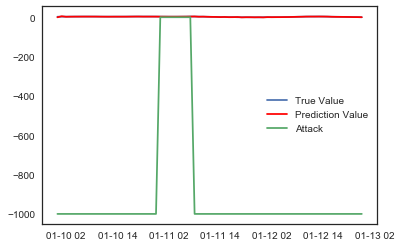

In [198]:
# plot prediction & expected
predictions = pd.Series(predictions)
predictions.index = test_data['L_T1'].index
start = '2016-01-10'
end = '2016-01-12'
plt.plot(test_data[start:end]['L_T1'], label="True Value")
plt.plot(predictions[start:end], color='red',label="Prediction Value")
plt.plot(test_data[start:end]['ATT_FLAG'], label="Attack")
plt.legend()
plt.show()

In [199]:
residualTest = pd.Series(resid)
residualTest.index = test_data['L_T1'].index

count    4177.000000
mean        0.091891
std         0.345340
min        -3.699210
25%         0.019181
50%         0.091697
75%         0.166777
max         3.907335
dtype: float64

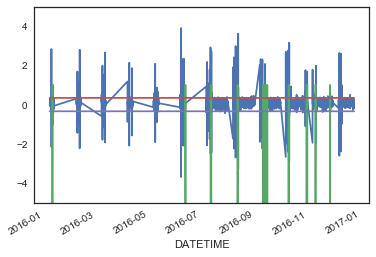

In [200]:
axes = plt.gca()
axes.set_ylim([-5,5])
residualTest.plot()
plt.plot(test_data['ATT_FLAG'], label="Attack")
thSeries = pd.Series([threshold]*len(residualTest))
thSeries.index = residualTest.index
thSeries.plot()
(-1 * thSeries).plot()
residualTest.describe()

Let's try to do anomaly detection using ARMA model on L_T1 alone

In [201]:
print("threshold:", threshold)
anomaly_detection = pd.DataFrame()
anomaly_detection['L_T1'] = [1 if abs(x) > threshold else 0 for x in residualTest]
anomaly_detection.index = residualTest.index
anomaly_detection.sort_index(inplace=True)
anomaly_detection['L_T1'].value_counts()

threshold: 0.34213059317563665


0    3918
1     259
Name: L_T1, dtype: int64

Let's try to calculate the confusion matrix

In [202]:
def evaluate_anomaly_detection(test_data, anomaly_detection, sensors):
    conditions = False
    for sensor in sensors:
        conditions = conditions|(anomaly_detection[sensor] == 1)
    tp = sum(test_data[conditions]['ATT_FLAG'] == 1)
    fp = sum(test_data[conditions]['ATT_FLAG'] != 1)
    tn = sum(test_data['ATT_FLAG'] != 1) - fp
    fn = sum(test_data['ATT_FLAG'] == 1) - tp
    print("[TP FP TN FN]:",tp,fp,tn,fn)
    
    if (tp+fp == 0): 
        print('precision:',0)
    else:
        print('precision:',1.0 * tp/(tp+fp))
        
    if (tp+fn == 0):
        print("recall:", 0)
    else:
        print('recall:' ,1.0 * tp/(tp+fn))



In [203]:
evaluate_anomaly_detection(test_data, anomaly_detection, ['L_T1'])

[TP FP TN FN]: 35 224 3734 184
precision: 0.13513513513513514
recall: 0.1598173515981735


Let's try to incorporate other sensors

In [204]:
models = {}
# tuning parameters for each sensor, it will take some time. you can adjust the code to calculate several sensors only
# e.g. for sensor in ["L_T1", "L_T2", "L_T3"]
for sensor in sensors:
    print(sensor)
    stepwise_model = auto_arima(data[sensor], start_p=1, start_q=1,
                           max_p=3, max_q=3, seasonal=False,
                           d=0, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
    print(stepwise_model)
    models[sensor] = stepwise_model

L_T1
Fit ARIMA: order=(1, 0, 1); AIC=-7752.456, BIC=-7724.143, Fit time=3.150 seconds
Fit ARIMA: order=(0, 0, 0); AIC=28103.160, BIC=28117.316, Fit time=0.004 seconds
Fit ARIMA: order=(1, 0, 0); AIC=-558.100, BIC=-536.866, Fit time=0.082 seconds
Fit ARIMA: order=(0, 0, 1); AIC=16531.825, BIC=16553.059, Fit time=1.018 seconds
Fit ARIMA: order=(2, 0, 1); AIC=-13266.336, BIC=-13230.946, Fit time=9.383 seconds
Fit ARIMA: order=(2, 0, 0); AIC=-13038.324, BIC=-13010.011, Fit time=1.519 seconds
Fit ARIMA: order=(2, 0, 2); AIC=-13286.692, BIC=-13244.224, Fit time=5.070 seconds
Fit ARIMA: order=(3, 0, 3); AIC=-13411.243, BIC=-13354.618, Fit time=9.499 seconds
Fit ARIMA: order=(2, 0, 3); AIC=-13301.274, BIC=-13251.727, Fit time=7.409 seconds
Fit ARIMA: order=(3, 0, 2); AIC=-13412.405, BIC=-13362.859, Fit time=9.831 seconds
Fit ARIMA: order=(3, 0, 1); AIC=-13277.969, BIC=-13235.500, Fit time=5.837 seconds
Total fit time: 52.809 seconds
ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(

Fit ARIMA: order=(2, 0, 2); AIC=50995.199, BIC=51037.667, Fit time=5.911 seconds
Fit ARIMA: order=(3, 0, 3); AIC=50966.693, BIC=51023.318, Fit time=8.793 seconds
Fit ARIMA: order=(2, 0, 3); AIC=50970.595, BIC=51020.142, Fit time=7.883 seconds
Fit ARIMA: order=(3, 0, 2); AIC=50938.084, BIC=50987.630, Fit time=40.031 seconds
Fit ARIMA: order=(3, 0, 1); AIC=50996.353, BIC=51038.821, Fit time=5.798 seconds
Total fit time: 78.596 seconds
ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(3, 0, 2),
   out_of_sample_size=0, scoring='mse', scoring_args={},
   seasonal_order=None, solver='lbfgs', start_params=None,
   suppress_warnings=True, transparams=True, trend='c')
F_PU2
Fit ARIMA: order=(1, 0, 1); AIC=75956.451, BIC=75984.763, Fit time=2.086 seconds
Fit ARIMA: order=(0, 0, 0); AIC=90456.822, BIC=90470.978, Fit time=0.005 seconds
Fit ARIMA: order=(1, 0, 0); AIC=75975.197, BIC=75996.431, Fit time=0.135 seconds
Fit ARIMA: order=(0, 0, 1); AIC=83265.488, BIC=83286.722, Fit time=0.34

Fit ARIMA: order=(3, 0, 2); AIC=66679.258, BIC=66728.805, Fit time=5.416 seconds
Total fit time: 32.492 seconds
ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(3, 0, 3),
   out_of_sample_size=0, scoring='mse', scoring_args={},
   seasonal_order=None, solver='lbfgs', start_params=None,
   suppress_warnings=True, transparams=True, trend='c')
F_PU11
Fit ARIMA: order=(1, 0, 1); AIC=7081.514, BIC=7109.826, Fit time=3.526 seconds
Fit ARIMA: order=(0, 0, 0); AIC=12016.750, BIC=12030.906, Fit time=0.008 seconds
Fit ARIMA: order=(1, 0, 0); AIC=9556.462, BIC=9577.697, Fit time=0.049 seconds
Fit ARIMA: order=(0, 0, 1); AIC=7079.515, BIC=7100.749, Fit time=5.338 seconds
Fit ARIMA: order=(0, 0, 2); AIC=7081.514, BIC=7109.826, Fit time=6.913 seconds
Fit ARIMA: order=(1, 0, 2); AIC=7083.480, BIC=7118.870, Fit time=11.057 seconds
Total fit time: 26.895 seconds
ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(0, 0, 1),
   out_of_sample_size=0, scoring='mse', scoring_args={},
  

Fit ARIMA: order=(2, 0, 1); AIC=59471.371, BIC=59506.761, Fit time=2.516 seconds
Fit ARIMA: order=(2, 0, 0); AIC=59479.661, BIC=59507.973, Fit time=0.192 seconds
Fit ARIMA: order=(2, 0, 2); AIC=59404.972, BIC=59447.440, Fit time=5.256 seconds
Fit ARIMA: order=(3, 0, 3); AIC=59261.849, BIC=59318.474, Fit time=10.211 seconds
Fit ARIMA: order=(2, 0, 3); AIC=59369.590, BIC=59419.136, Fit time=6.830 seconds
Fit ARIMA: order=(3, 0, 2); AIC=59312.224, BIC=59361.770, Fit time=9.185 seconds
Total fit time: 47.888 seconds
ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(3, 0, 3),
   out_of_sample_size=0, scoring='mse', scoring_args={},
   seasonal_order=None, solver='lbfgs', start_params=None,
   suppress_warnings=True, transparams=True, trend='c')
P_J302
Fit ARIMA: order=(1, 0, 1); AIC=46067.594, BIC=46095.906, Fit time=2.069 seconds
Fit ARIMA: order=(0, 0, 0); AIC=50890.269, BIC=50904.425, Fit time=0.004 seconds
Fit ARIMA: order=(1, 0, 0); AIC=46248.710, BIC=46269.945, Fit time=0.0

In [205]:
# function calculate residuals on test set (dataset04)
def calculate_residuals_test_set(test_data, sensor, model_fit, verbose=False):
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        # save model coefficients
        ar_coef, ma_coef = model_fit.arparams, model_fit.maparams

        predictions = list()
        start = max(arma_order)
        resid = [0] * start
        predictions = [0] * start
        for t in range(start,len(test_data[sensor])):
            if verbose: 
                print("t=",t)
            history = test_data[sensor][:t]
            yhat = arma_predict(ar_coef, history) + arma_predict(ma_coef, resid)
            predictions.append(yhat)
            expected = test_data[sensor][t]
            resid.append(expected - yhat)
            if verbose:
                print('>predicted=%.3f, expected=%.3f' % (yhat, expected))
        rmse = np.sqrt(mean_squared_error(test_data[sensor], predictions))
        print('Test RMSE: %.3f' % rmse)
        
        residualTest = pd.Series(resid)
        residualTest.index = test_data[sensor].index
        return residualTest

In [206]:
# fit model and save thresholds, residuals, and anomaly detection result
thresholds = {}
residualsTrainDataFrame = pd.DataFrame()
residualsTestDataFrame = pd.DataFrame()
anomalyDetection = pd.DataFrame()
for sensor in sensors:
    print("Building model for",sensor)
    arma_order = (models[sensor].order[0], models[sensor].order[2])
    if arma_order == (0,0): 
        continue #skip
    #build model
    model_fit = ARMA(data[sensor], order=arma_order).fit()
    #store residuals
    residualsTraining = model_fit.resid
    residualsTrainDataFrame[sensor] = residualsTraining
    thresholds[sensor] = adjust_threshold(residualsTraining,99)
    print("Threshold:",thresholds[sensor])
    residualTest = calculate_residuals_test_set(test_data, sensor, model_fit)
    residualsTestDataFrame[sensor] = residualTest
    anomaly_detection[sensor] = [1 if abs(x) > thresholds[sensor] else 0 for x in residualTest]
    anomaly_detection.index = residualTest.index
    anomaly_detection.sort_index(inplace=True)
    evaluate_anomaly_detection(test_data, anomaly_detection, [sensor])

Building model for L_T1
Threshold: 0.34306469390068894
Test RMSE: 0.415
[TP FP TN FN]: 59 640 3318 160
precision: 0.0844062947067239
recall: 0.2694063926940639
Building model for L_T2
Threshold: 0.6811094618390973
Test RMSE: 0.578
[TP FP TN FN]: 45 681 3277 174
precision: 0.06198347107438017
recall: 0.2054794520547945
Building model for L_T3
Threshold: 0.38356530409770034
Test RMSE: 1.872
[TP FP TN FN]: 219 3955 3 0
precision: 0.05246765692381409
recall: 1.0
Building model for L_T4
Threshold: 1.0425834806145733
Test RMSE: 1.481
[TP FP TN FN]: 178 3268 690 41
precision: 0.05165409170052235
recall: 0.8127853881278538
Building model for L_T5
Threshold: 0.5528711140589172
Test RMSE: 2.954
[TP FP TN FN]: 219 3955 3 0
precision: 0.05246765692381409
recall: 1.0
Building model for L_T6
Threshold: 0.33582550790853893
Test RMSE: 6.195
[TP FP TN FN]: 219 3955 3 0
precision: 0.05246765692381409
recall: 1.0
Building model for L_T7
Threshold: 1.428698451788841
Test RMSE: 1.804
[TP FP TN FN]: 159 274

In [207]:
evaluate_anomaly_detection(test_data, anomaly_detection, [sensor for sensor in anomaly_detection.keys()])

[TP FP TN FN]: 219 3955 3 0
precision: 0.05246765692381409
recall: 1.0


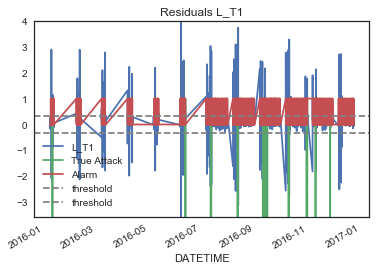

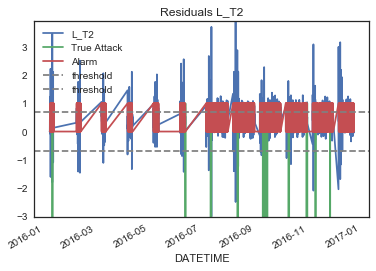

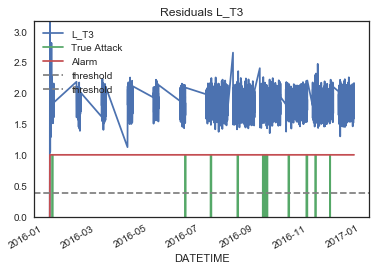

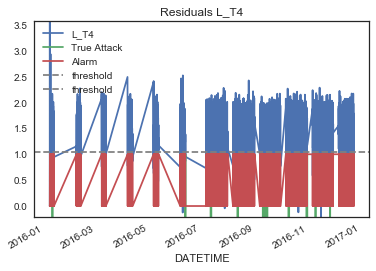

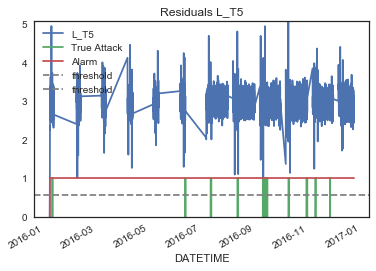

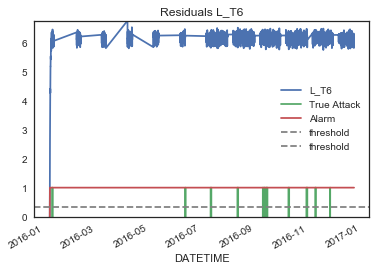

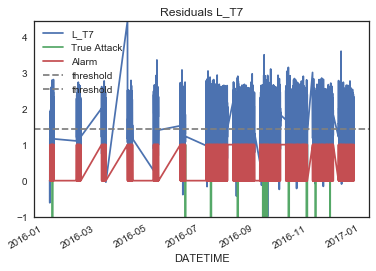

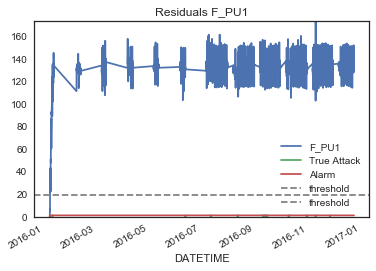

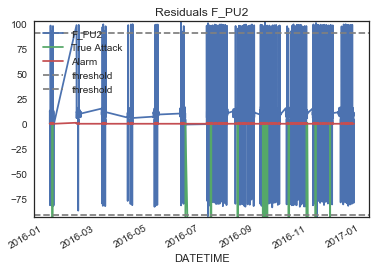

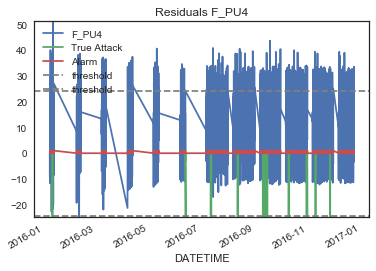

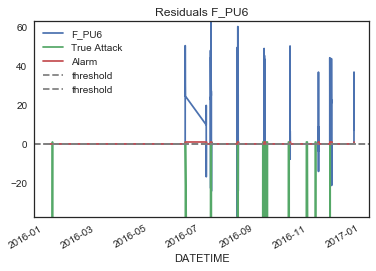

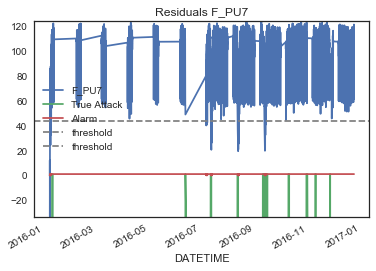

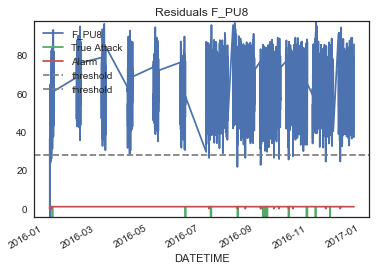

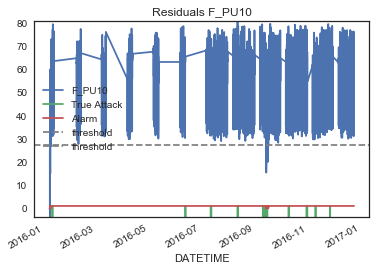

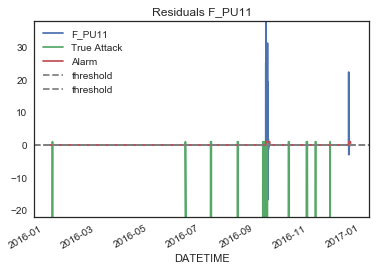

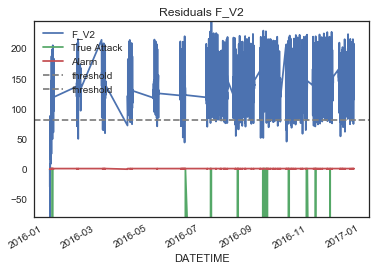

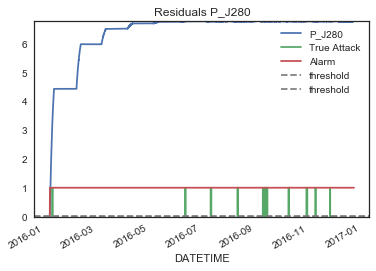

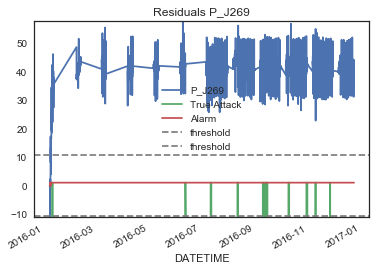

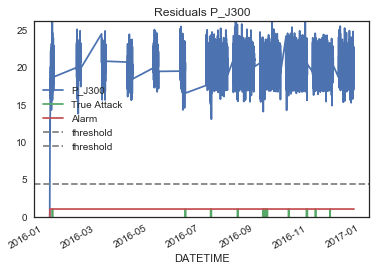

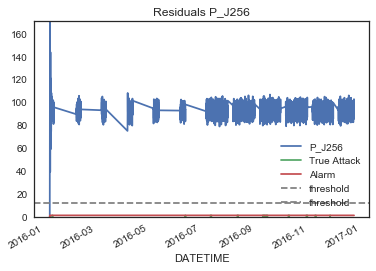

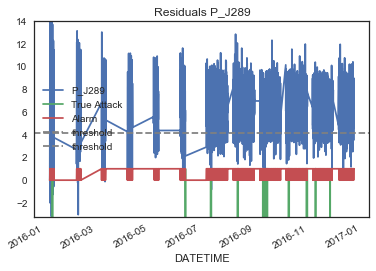

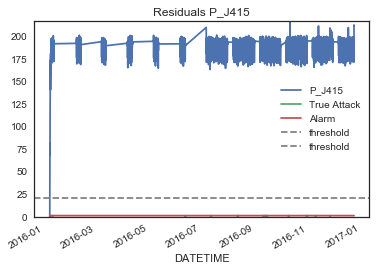

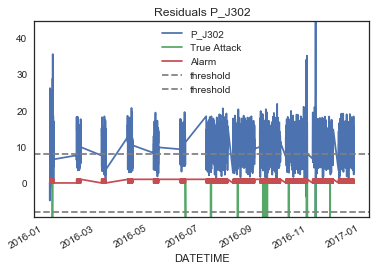

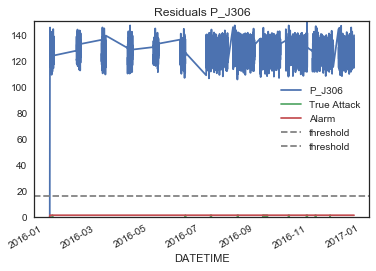

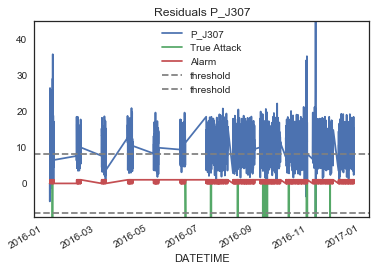

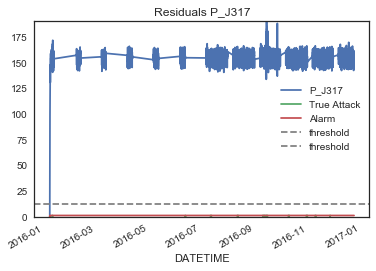

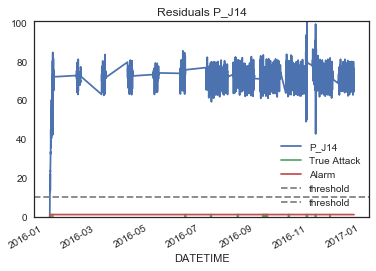

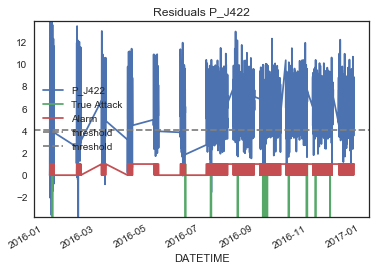

In [208]:
# plot individual signal residual plots + threshold
for sensor in [sensor for sensor in anomaly_detection.keys()]:
    plt.figure()
    axes = plt.gca()
    axes.set_ylim([min(residualsTestDataFrame[sensor]),max(residualsTestDataFrame[sensor])])
    plt.title("Residuals "+sensor)
    residualsTestDataFrame[sensor].plot()
    plt.plot(test_data['ATT_FLAG'], label="True Attack")
    plt.plot(anomaly_detection[sensor], label="Alarm")

    plt.axhline(y=thresholds[sensor], label="threshold", linestyle='--',color='gray')
    plt.axhline(y=-1*thresholds[sensor], label="threshold", linestyle='--',color='gray')
    plt.legend()